In [1]:
import os
import sys

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math

#the line below makes the plot as a pop-up, that can be saved
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import matplotlib.cm as cm
from matplotlib.colors import Normalize

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.core.exceptions import NoHits

In [2]:
import functions.histo_functions as myhf
import functions.efficiency_functions as myef
import functions.recovstrue as myrvt

In [3]:
filepath = '/Users/halmamol/NEXT/files/NEXT100/'
event = 'e-_roi'

In [4]:
#FULLSIM files
track_list = []

#loop over all the files, to read 'Tracks' information
for nfile in range(1,1000):
    
    filename_FS = filepath+f'esmeraldaFS/{event}/next100.{event}.{nfile}.cdst.h5'
    try:
        readfile = pd.read_hdf(filename_FS, 'Tracking/Tracks')
    except:
        print('File {} not good'.format(filename_0nubb))
        continue
        
    track_list.append(readfile)


track_list_FS = pd.concat([dt for dt in track_list]) 
track_list_FS.columns  

Index(['event', 'trackID', 'energy', 'length', 'numb_of_voxels',
       'numb_of_hits', 'numb_of_tracks', 'x_min', 'y_min', 'z_min', 'r_min',
       'x_max', 'y_max', 'z_max', 'r_max', 'x_ave', 'y_ave', 'z_ave', 'r_ave',
       'extreme1_x', 'extreme1_y', 'extreme1_z', 'extreme2_x', 'extreme2_y',
       'extreme2_z', 'blob1_x', 'blob1_y', 'blob1_z', 'blob2_x', 'blob2_y',
       'blob2_z', 'eblob1', 'eblob2', 'ovlp_blob_energy', 'vox_size_x',
       'vox_size_y', 'vox_size_z'],
      dtype='object')

In [5]:
track_list_FS

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,0,0,0.634359,65.696787,19,101,1,209.98,256.63,1198.214000,...,1204.143920,209.98,303.28,1202.448117,0.088706,0.087743,0.000000,13.606250,13.606250,11.539750
1,1,0,2.477796,152.795783,170,627,1,147.78,-396.47,7.917328,...,56.702796,241.08,-396.47,87.136835,0.102236,0.097247,0.000000,13.995000,14.353846,14.593138
2,2,0,2.307320,167.183211,157,592,1,334.38,23.38,1107.158375,...,1172.540671,443.23,163.33,1110.137951,0.103471,0.103298,0.000000,13.995000,14.254167,13.263021
3,3,0,2.461454,172.006506,143,610,1,-349.82,-178.77,659.259688,...,663.290032,-349.82,-178.77,718.610333,0.114521,0.106752,0.000000,14.353846,14.136364,12.313425
4,4,0,0.406786,48.167453,20,104,1,-349.82,-365.37,78.202344,...,83.384973,-303.17,-334.27,103.369442,0.133713,0.089259,0.000000,12.958333,11.662500,13.826250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,9987,0,2.443995,153.907121,150,593,1,-318.72,-303.17,398.125563,...,418.585202,-256.52,-147.67,407.301224,0.083350,0.038300,0.000000,13.822222,14.513333,11.857458
10,9988,0,2.312541,150.905734,140,582,3,-349.82,178.88,669.256000,...,730.912392,-318.72,178.88,693.822952,0.117892,0.088830,0.000000,14.994643,14.843182,14.907028
11,9988,1,0.114717,21.098800,3,9,3,38.93,38.93,464.069750,...,465.825232,38.93,54.48,465.641464,0.093558,0.067153,0.045994,14.994643,14.843182,14.907028
12,9988,2,0.041404,0.000000,1,2,3,-38.82,-23.27,364.010188,...,364.581132,-38.82,-23.27,364.581132,0.041404,0.041404,0.041404,14.994643,14.843182,14.907028


In [6]:
tracks_FS_1track = track_list_FS[track_list_FS.trackID == 0]
ntracks_FS = tracks_FS_1track.numb_of_tracks
ntracks_FS

0     1
1     1
2     1
3     1
4     1
     ..
6     2
8     1
9     1
10    3
13    1
Name: numb_of_tracks, Length: 9758, dtype: int64

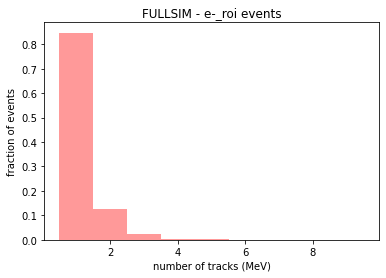

In [7]:
plt.hist(ntracks_FS, bins = 9, range = (0.5, 9.5),density=True, alpha=0.4, color='r', label = '0nubb')
plt.xlabel('number of tracks (MeV)')
plt.ylabel('fraction of events')
plt.title(f'FULLSIM - {event} events')

plt.show()

In [8]:
tracks_FS_1track_cut = tracks_FS_1track[tracks_FS_1track.numb_of_tracks == 1]
frac_1track_FS = 100*tracks_FS_1track_cut.event.nunique()/tracks_FS_1track.event.nunique()

Efrac_1track_FS = myef.ratio_error(frac_1track_FS, tracks_FS_1track_cut.event.nunique(), tracks_FS_1track.event.nunique(), 
                                             np.sqrt(tracks_FS_1track_cut.event.nunique()), np.sqrt(tracks_FS_1track.event.nunique()))
print(f'Amount of events with 1 track 0nubb = {frac_1track_FS} +- {Efrac_1track_FS}')

Amount of events with 1 track 0nubb = 84.70998155359705 +- 1.266286769186592


In [9]:
#0nubb files
track_list = []

#loop over all the files, to read 'Tracks' information
for nfile in range(1,1000):
    
    filename_DS = filepath+f'esmeraldaDS/{event}/esmeralda.{nfile}.MC.h5'
    try:
        readfile = pd.read_hdf(filename_DS, 'Tracking/Tracks')
    except:
        print('File {} not good'.format(filename_DS))
        continue
        
    track_list.append(readfile)


track_list_DS = pd.concat([dt for dt in track_list]) 
track_list_DS.columns  

Index(['event', 'trackID', 'energy', 'length', 'numb_of_voxels',
       'numb_of_hits', 'numb_of_tracks', 'x_min', 'y_min', 'z_min', 'r_min',
       'x_max', 'y_max', 'z_max', 'r_max', 'x_ave', 'y_ave', 'z_ave', 'r_ave',
       'extreme1_x', 'extreme1_y', 'extreme1_z', 'extreme2_x', 'extreme2_y',
       'extreme2_z', 'blob1_x', 'blob1_y', 'blob1_z', 'blob2_x', 'blob2_y',
       'blob2_z', 'eblob1', 'eblob2', 'ovlp_blob_energy', 'vox_size_x',
       'vox_size_y', 'vox_size_z'],
      dtype='object')

In [10]:
track_list_DS

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,0,0,2.481983,107.180945,113,541,1,178.88,241.08,1198.209000,...,1254.181328,225.53,241.08,1203.676316,0.118036,0.059646,0.000000,13.606250,13.822222,12.715725
1,1,0,2.493114,147.140058,141,583,1,147.78,-396.47,6.123813,...,55.205848,241.08,-396.47,87.090302,0.195080,0.103824,0.000000,13.995000,14.353846,14.625141
2,2,0,2.315395,170.048487,137,569,2,349.93,23.38,1106.204250,...,1173.609884,443.23,163.33,1109.930224,0.107214,0.094432,0.000000,13.995000,14.353846,14.205029
3,2,1,0.142151,20.047267,4,16,2,349.93,101.13,1285.172625,...,1288.692721,365.48,116.68,1288.708940,0.108415,0.098109,0.064374,13.995000,14.353846,14.205029
4,3,0,2.474586,171.559409,142,581,1,-349.82,-194.32,658.330750,...,663.806785,-349.82,-178.77,717.129859,0.108810,0.104765,0.000000,14.353846,13.995000,12.308313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,9987,0,2.476697,138.333002,133,551,1,-318.72,-303.17,396.348000,...,406.991827,-256.52,-303.17,418.133510,0.121118,0.084895,0.000000,13.822222,14.353846,12.460667
10,9988,0,2.337649,149.285901,133,559,3,-334.27,178.88,669.254875,...,682.711312,-225.42,287.73,731.264582,0.155635,0.110814,0.000000,14.974074,14.873913,14.795900
11,9988,1,0.112939,14.974074,2,6,3,38.93,38.93,463.129813,...,465.517586,54.48,38.93,465.350552,0.112939,0.112939,0.112939,14.974074,14.873913,14.795900
12,9988,2,0.042155,14.974074,2,2,3,-54.37,-23.27,364.962375,...,364.962375,-38.82,-23.27,364.962375,0.042155,0.042155,0.042155,14.974074,14.873913,14.795900


In [11]:
tracks_DS_1track = track_list_DS[track_list_DS.trackID == 0]
ntracks_DS = tracks_DS_1track.numb_of_tracks
ntracks_DS

0     1
1     1
2     2
4     1
5     1
     ..
6     2
8     1
9     1
10    3
13    1
Name: numb_of_tracks, Length: 9768, dtype: int64

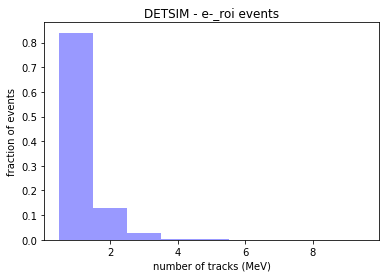

In [12]:
plt.hist(ntracks_DS, bins = 9, range = (0.5, 9.5),density=True, alpha=0.4, color='b', label = '0nubb')
plt.xlabel('number of tracks (MeV)')
plt.ylabel('fraction of events')
plt.title(f'DETSIM - {event} events')

plt.show()

In [13]:
tracks_DS_1track_cut = tracks_DS_1track[tracks_DS_1track.numb_of_tracks == 1]
frac_1track_DS = 100*tracks_DS_1track_cut.event.nunique()/tracks_DS_1track.event.nunique()

Efrac_1track_DS = myef.ratio_error(frac_1track_DS, tracks_DS_1track_cut.event.nunique(), tracks_DS_1track.event.nunique(), 
                                             np.sqrt(tracks_DS_1track_cut.event.nunique()), np.sqrt(tracks_DS_1track.event.nunique()))
print(f'Amount of events with 1 track 0nubb = {frac_1track_DS} +- {Efrac_1track_DS}')

Amount of events with 1 track 0nubb = 83.9987714987715 +- 1.2578854783550157


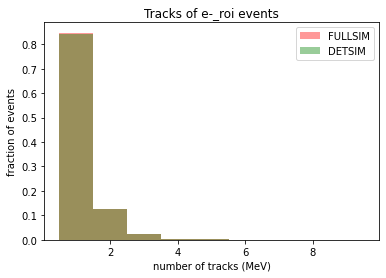

In [14]:
plt.hist(ntracks_FS, bins = 9, range = (0.5, 9.5),density=True, alpha=0.4, color='r', label = 'FULLSIM')
plt.hist(ntracks_DS, bins = 9, range = (0.5, 9.5), density=True, alpha=0.4, color='g',label = 'DETSIM')

plt.xlabel('number of tracks (MeV)')
plt.ylabel('fraction of events')
plt.title(f'Tracks of {event} events')
plt.legend(loc=1);
plt.show()